In [1]:
#importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the file
car=pd.read_csv(r"CarPrice_Assignment.csv")
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# percentage of missing values in each column
round(car.isnull().sum()/len(car.index), 2)*100

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [4]:
#analysing the columns in the data
car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [5]:
car.CarName

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object

In [6]:
#Splitting company name from CarName column because CarName comprise of 2 element Company name and model name we only need company name
CompanyName = car['CarName'].apply(lambda x : x.split(' ')[0])
print(CompanyName)

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object


In [7]:
car.insert(3,"CompanyName",CompanyName)
car.drop(["CarName"],axis=1,inplace=True)
car.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
#removing false company name to correct ones
car.CompanyName = car.CompanyName.str.lower()

def replace_name(a,b):
    car.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

car.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [9]:
np.corrcoef(car['carlength'], car['carwidth'])[0, 1]

0.841118268481845

In [10]:
car['fueleconomy'] = (0.55 * car['citympg']) + (0.45 * car['highwaympg'])
print(car['fueleconomy'])

0      23.70
1      23.70
2      22.15
3      26.70
4      19.80
       ...  
200    25.25
201    21.70
202    20.25
203    26.45
204    21.70
Name: fueleconomy, Length: 205, dtype: float64


In [11]:
#binning
car['price'] = car['price'].astype('int')
temp = car.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
car_bin=['Budget','Medium','Highend']
car['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=car_bin)
car.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


In [12]:
cars_lr = car[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth', 'carsrange']]
cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium


In [13]:
cars_lr.shape

(205, 16)

In [14]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

cars_lr = dummies('fueltype',cars_lr)
cars_lr = dummies('aspiration',cars_lr)
cars_lr = dummies('carbody',cars_lr)
cars_lr = dummies('drivewheel',cars_lr)
cars_lr = dummies('enginetype',cars_lr)
cars_lr = dummies('cylindernumber',cars_lr)
cars_lr = dummies('carsrange',cars_lr)

In [15]:
cars_lr.shape

(205, 31)

In [16]:
cars_lr.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,...,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,...,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,...,0,0,1,0,0,0,0,0,1,0


In [17]:
cars_lr.columns

Index(['price', 'wheelbase', 'curbweight', 'enginesize', 'boreratio',
       'horsepower', 'fueleconomy', 'carlength', 'carwidth', 'gas', 'turbo',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l',
       'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three',
       'twelve', 'two', 'Medium', 'Highend'],
      dtype='object')

In [18]:
X= cars_lr.iloc[ : ,6:7].values
y= cars_lr.iloc[ : ,0].values
X.shape

(205, 1)

In [19]:
y

array([13495, 16500, 16500, 13950, 17450, 15250, 17710, 18920, 23875,
       17859, 16430, 16925, 20970, 21105, 24565, 30760, 41315, 36880,
        5151,  6295,  6575,  5572,  6377,  7957,  6229,  6692,  7609,
        8558,  8921, 12964,  6479,  6855,  5399,  6529,  7129,  7295,
        7295,  7895,  9095,  8845, 10295, 12945, 10345,  6785,  8916,
        8916, 11048, 32250, 35550, 36000,  5195,  6095,  6795,  6695,
        7395, 10945, 11845, 13645, 15645,  8845,  8495, 10595, 10245,
       10795, 11245, 18280, 18344, 25552, 28248, 28176, 31600, 34184,
       35056, 40960, 45400, 16503,  5389,  6189,  6669,  7689,  9959,
        8499, 12629, 14869, 14489,  6989,  8189,  9279,  9279,  5499,
        7099,  6649,  6849,  7349,  7299,  7799,  7499,  7999,  8249,
        8949,  9549, 13499, 14399, 13499, 17199, 19699, 18399, 11900,
       13200, 12440, 13860, 15580, 16900, 16695, 17075, 16630, 17950,
       18150,  5572,  7957,  6229,  6692,  7609,  8921, 12764, 22018,
       32528, 34028,

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.predict(X_test)

array([  6854.81961345,  19613.6483672 ,  19168.57294555,  -8525.00884553,
        12245.17749778,  14223.29048286,   2255.70692314,  11701.19642689,
        19168.57294555,   9179.10237091,  16745.38453883,  18921.30882242,
        21146.68593063,   6409.7441918 ,    821.57500896,  14223.29048286,
        14322.19613211,  19168.57294555,  11256.12100524,   6854.81961345,
        14767.27155376,  19613.6483672 ,  14322.19613211,  14223.29048286,
        19613.6483672 ,   7744.97045673,   7843.87610599,  19613.6483672 ,
        10267.06451271,   7299.89503509,  10811.0455836 ,  13234.23399032,
        18278.42210227,   9723.08344181,   7299.89503509,  22135.74242317,
        14668.3659045 ,  18723.49752391,   6854.81961345,  25894.15709482,
          821.57500896,  21047.78028138,  23916.04410974,  16745.38453883,
        14668.3659045 ,   6854.81961345,   6854.81961345,  19613.6483672 ,
        17882.79950525,  10811.0455836 ,  22481.91219556,  -6101.82043881,
         9723.08344181,  

In [21]:
model.coef_

array([-989.05649254])

In [22]:
model.intercept_

40631.09883364462

In [23]:
X_train

array([[26.7 ],
       [30.25],
       [30.15],
       [20.6 ],
       [26.25],
       [21.25],
       [25.25],
       [30.7 ],
       [28.7 ],
       [22.15],
       [28.7 ],
       [26.7 ],
       [21.25],
       [26.25],
       [25.7 ],
       [21.25],
       [14.9 ],
       [25.8 ],
       [41.05],
       [36.8 ],
       [33.7 ],
       [26.7 ],
       [33.7 ],
       [38.8 ],
       [42.05],
       [19.25],
       [30.45],
       [23.7 ],
       [33.7 ],
       [30.25],
       [33.7 ],
       [28.7 ],
       [24.45],
       [25.8 ],
       [23.35],
       [14.8 ],
       [16.8 ],
       [28.15],
       [20.25],
       [24.15],
       [33.7 ],
       [26.7 ],
       [26.25],
       [22.15],
       [40.25],
       [18.7 ],
       [34.15],
       [30.15],
       [27.35],
       [26.45],
       [21.7 ],
       [23.35],
       [21.25],
       [34.15],
       [33.15],
       [39.25],
       [34.9 ],
       [33.7 ],
       [29.25],
       [25.7 ],
       [26.7 ],
       [19.25],
       [

In [24]:
X_test

array([[34.15],
       [21.25],
       [21.7 ],
       [49.7 ],
       [28.7 ],
       [26.7 ],
       [38.8 ],
       [29.25],
       [21.7 ],
       [31.8 ],
       [24.15],
       [21.95],
       [19.7 ],
       [34.6 ],
       [40.25],
       [26.7 ],
       [26.6 ],
       [21.7 ],
       [29.7 ],
       [34.15],
       [26.15],
       [21.25],
       [26.6 ],
       [26.7 ],
       [21.25],
       [33.25],
       [33.15],
       [21.25],
       [30.7 ],
       [33.7 ],
       [30.15],
       [27.7 ],
       [22.6 ],
       [31.25],
       [33.7 ],
       [18.7 ],
       [26.25],
       [22.15],
       [34.15],
       [14.9 ],
       [40.25],
       [19.8 ],
       [16.9 ],
       [24.15],
       [26.25],
       [34.15],
       [34.15],
       [21.25],
       [23.  ],
       [30.15],
       [18.35],
       [47.25],
       [31.25],
       [28.7 ],
       [21.25],
       [21.7 ],
       [38.7 ],
       [19.25],
       [28.7 ],
       [34.15],
       [51.25],
       [24.15],
       [

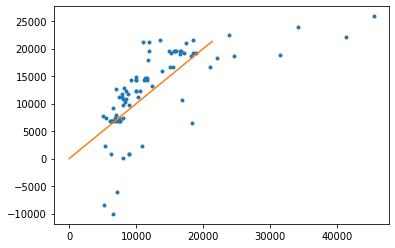

In [34]:
y_pred = model.predict(X_test) 
plt.plot(y_test, y_pred, '.')

x = np.linspace(0, 21330, 15100)
y = x
plt.plot(x, y)
plt.show()